In [34]:
import numpy as np
import copy as copy
import random as random

In [80]:
class HierarchicalMaze():
    def __init__(self,nlayers,barrier):
        self.action_space=['n','s','e','w','*']
        self.layers=nlayers
        self.shape=4**(int(self.layers-1))
        shape=[(x,4**(int(x-1))) for x in range(1,self.layers+1,1)]
        self.Maze=[(x[0],np.zeros((int(x[1]**0.5),int(x[1]**0.5)))) for x in shape]
        
#         self.Maze_2=[(x[0],np.zeros((len(env.action_space),int(x[1]**0.5),int(x[1]**0.5)))) for x in shape]
        
#         create random barriers
        if barrier==True:
            mask=np.random.rand(self.Maze[self.layers-1][1].shape[0],self.Maze[self.layers-1][1].shape[0])
            self.Maze[self.layers-1][1][mask>0.9]=1
        
            
    def set_goal_state(self):
        self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
        while self.Maze[self.layers-1][1][self.goal_state[0]][self.goal_state[1]]==1:
            self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
    def reset(self):  
#       random starting state  
        s1=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
        self.starting_state=copy.deepcopy(s1)
        self.current_state=copy.deepcopy(self.starting_state)
# make sure goal and starting state not the same
        c1= self.goal_state==self.starting_state
        c2= self.Maze[self.layers-1][1][self.starting_state[0]][self.starting_state[1]]==1
        count=0
        while c1 or c2 :
#              self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
            self.starting_state=self.current_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
            count=count+1
            if count>10:
                if c2:
                    self.Maze[self.layers-1][1][self.starting_state[0]][self.starting_state[1]]=0
            c1= self.goal_state==self.starting_state
            c2= self.Maze[self.layers-1][1][self.starting_state[0]][self.starting_state[1]]==1
        
# get super managers of lowest level
#         print('starting state set')
        self.starting_managers=self.get_super_manager(self.starting_state)
        self.manager_list=self.get_super_manager(self.starting_state)
#         initialize first manager
        self.starting_level=self.current_level=0
#         initialize sub manager goals to be the same as current sub managers
        self.tasks=[0 for x in range(self.layers)]
        self.tasks[0]=4
        
        self.tasks[1]=4
        
#         self.starting_state_init=self.starting_managers[0]
#         self.done=False
# just to know
        self.goal_locations=self.goals=self.get_super_manager(self.goal_state)
        self.task_locations=copy.deepcopy(self.starting_managers)

    def step(self,action):
        done=False
        level=copy.deepcopy(self.current_level)
        old_state=copy.deepcopy(self.current_state)
        old_level=copy.deepcopy(self.current_level)

        current_manager_list=self.get_super_manager(self.current_state)
        reward=-1
#         if at top level change action to go down one level
        if level==0:
            
            action=4
            self.current_level=level+1
#   if action to explore sub layer, change current level and ensure cant go too low
        

# if action directional
        else:
#         if level is the lowest level--> primitive actions
            if level==self.layers-1:
#                 print('primitive actions')
#                 print('Base Level')
#                 print('0 x down, 1 x up,2 y up(east),3 y down (west)')
# south
                if action == 0: 
                    if self.current_state[0]-1>=0:
                        if self.Maze[level][1][self.current_state[0]-1][self.current_state[1]]!=1:
                            self.current_state[0]=self.current_state[0]-1
                            
#               north
                elif action == 1:
                    if self.current_state[0]+1<self.Maze[level][1].shape[0]:
                        if self.Maze[level][1][self.current_state[0]+1][self.current_state[1]]!=1:

                            self.current_state[0]=self.current_state[0]+1
#               East
                elif action==2:

                    if self.current_state[1]+1<self.Maze[level][1].shape[0]:
                        if self.Maze[level][1][self.current_state[0]][self.current_state[1]+1]!=1:

                            self.current_state[1]=self.current_state[1]+1
#               West
                elif action==3:
                    if self.current_state[1]-1>=0:
                        if self.Maze[level][1][self.current_state[0]][self.current_state[1]-1]!=1:

                            self.current_state[1]=self.current_state[1]-1
                            
                elif action == 4:

                        reward=-1
# if not lowest level basically choosing a new task, pnly update task is action at managerial level is possible
        
            if level<self.layers-1:
#                 print('Action at higher level',action)
#                 print('Level:',level)
#                 check which state per that level
                state_in_level=current_manager_list[level]
#             for each action set a new goal for that level and go to level below to get there
                if action == 4:
                    self.current_level=level+1
#                     print('Using Search so changing task location for this level to current state')
#                     print('Old task Location',self.task_locations[level])
#                     print('New task location',state_in_level)
                    self.task_locations[level]=state_in_level

#                     print('New task location confirmation',self.task_locations[level])

    
    
                if action == 0:
                    if state_in_level[0]-1>=0:
#                         self.goals[level][0]=state_in_level[0]-1
                        self.current_level=level+1
                        self.task_locations[level][0]=state_in_level[0]-1
                        self.task_locations[level][1]=state_in_level[1]
#                         self.tasks[level+1]=action
                        

                elif action == 1:
                    if state_in_level[0]+1<self.Maze[level][1].shape[0]:

#                         self.goals[level][0]=state_in_level[0]+1
                        self.current_level=level+1
                        self.task_locations[level][0]=state_in_level[0]+1
                        self.task_locations[level][1]=state_in_level[1]
#                         self.tasks[level+1]=action
                elif action==2:
#                     make sure doens't go past boundaries
                    if state_in_level[1]+1<self.Maze[level][1].shape[0]:
                        self.task_locations[level][1]=state_in_level[1]+1
                        self.task_locations[level][0]=state_in_level[0]
#                         self.goals[level][1]=state_in_level[1]+1
                        self.current_level=level+1
#                         self.tasks[level+1]=action

                elif action==3:
#                     if state_in_level[1]-1>=0:
                    if state_in_level[1]-1>=0:

                        self.task_locations[level][1]=state_in_level[1]-1
                        self.task_locations[level][0]=state_in_level[0]

#                         self.goals[level][1]=state_in_level[1]-1
                        self.current_level=level+1
#                         self.tasks[level+1]=action
                

# update manager list if current state has changed, current state is always lowest level
# therefore only need to check at lowest level
        new_manager_list=self.get_super_manager(self.current_state)
        if level==self.layers-1:
    
            self.manager_list=new_manager_list
    #         Check for termination
            if self.current_state==self.goal_state:
                reward=1
                done=True 
                
            else:
                reward=-1
    #           Move agent if gone to new state where super managers have changed and new manager not in goal states
            if new_manager_list!=current_manager_list:
                    for i in range(len(current_manager_list)-1,0,-1):
        #                 print(i)
        #           if new super manager found go up one level,shouuld be iterative i.e. can't get a new super manager in level 1, without getting one in level 2

                        if current_manager_list[i]!=new_manager_list[i]:
#                             if new_manager_list[i]!=self.goals[i]:
#     #                             large penalty for failing
# #                                 reward=-10
#                                 self.current_level=self.current_level-1
#                             else:

                            self.current_level=self.current_level-1
        #                         print('SubGoalAccomplishedAtLevel:'+str(i))
        info={'SubGoals':self.goals,'CurrentLevel':self.current_level,'ManagerList':new_manager_list}
        
        return self.current_state,reward,done,info,old_state,old_level
        
    

    def get_super_manager(self,current_state):
#         find which super manager per finest location state
        super_managers=[]
        number_of_levels=max([x[0] for x in env.Maze])
#         super_managers.append([np.floor(x/(2**(number_of_levels-1)/2)) for x in current_state])
        super_managers.append([np.floor(x/2) for x in current_state])
        if number_of_levels-2>1:
            for i in range(number_of_levels-2):
                super_managers.append([np.floor(x/2) for x in super_managers[-1]])
#                 print(i)
        else:
            super_managers.append([0,0])
        return super_managers[::-1]  
        
        



In [81]:
# Qtable to keep track of state action values
class Hierarchical_QTable:
    def __init__(self,env,learning_rate=0.1,reward_decay=1.0,epsilon=.1):
#         self.number_actions=len(env.action_space)
#         self.Q_table={}
#         for i in range(len(env.Maze)):
#             self.Q_table[i]={}
#             for na in self.number_actions:
#                 self.Q_table[i][na]={env.Maze[i]}
        self.lr=learning_rate
        self.gamma=reward_decay
        self.epsilon=epsilon
        self.number_actions=len(env.action_space)
        self.Q_table={}
        self.Visit_Table={}
        self.temp={}
        self.n_trials=0
        self.c_iz={}
        self.sub_task_rewards={}
        self.timeout_level={}
#         Define table
        for i in range(len(env.Maze)):
            
                
            self.Q_table[i]={} 
            self.Visit_Table[i]={}
            self.c_iz[i]={}
            self.sub_task_rewards[i]=0
            self.timeout_level[i]=2**(env.layers-i)
            if i ==0:
                
                        self.Q_table[i][(0,0),tuple(env.goal_locations[i]),4]={4:0}
                        self.Visit_Table[i][(0,0),tuple(env.goal_locations[i]),4]={4:0}
                        self.c_iz[i][(0,0)]=0
                
                
                
                
            else:
                for state_x in range(env.Maze[i][1].shape[0]):
                    for state_y in range(env.Maze[i][1].shape[0]):
                        if i!=env.layers-1:
                            self.c_iz[i][(state_x,state_y)]=0
                        for task in range(self.number_actions):

                            if i== env.layers-1:
                                if task<self.number_actions:
                                    self.Q_table[i][(state_x,state_y),task]={x:0 for x in range(self.number_actions-1)}
                                    self.Visit_Table[i][(state_x,state_y),task]={x:0 for x in range(self.number_actions-1)}
#                                     self.c_iz[i][(state_x,state_y),task]=0
                            else:
                                for g_x in range(env.Maze[i][1].shape[0]):
                                    for g_y in range(env.Maze[i][1].shape[0]):
                                        self.Q_table[i][(state_x,state_y),(g_x,g_y),task]={x:0 for x in range(self.number_actions)}
                                        self.Visit_Table[i][(state_x,state_y),(g_x,g_y),task]={x:0 for x in range(self.number_actions)}
                                        
    
    
    def reset_ciz(self):
        for i in self.c_iz.keys():
            for j in self.c_iz[i].keys():
                self.c_iz[i][j]=0
        
        
        
        
    
    def get_temp(self,g):
        tmax=75
        beta=0.992
        tmin=0.5
        g=tuple(g)
        if len(self.temp.keys())==0:
            self.temp[g]={'l':1,'temp':tmax}
        else:
            if g not in self.temp.keys():
                self.temp[g]={'l':1,'temp':tmax}
            else:

                self.temp[g]={'l':self.temp[g]['l']+1,'temp':tmin+beta*(self.temp[g]['temp']-tmin)}
            
    def learning_rate(self):
        n=self.n_trials/20
        tau=50
        alpha_0=0.5
        return alpha_0*tau/(tau+n)
    
#     choose action epsilon greedy
    def get_actions_possible(self,env):
        goal_per_level=copy.deepcopy(env.goal_locations)
        current_states_per_level=copy.deepcopy(env.manager_list)
        self.actions_possible=[]
        for i in range(len(goal_per_level)):
            if i==0:
                self.actions_possible.append([4])
            else:
                if goal_per_level[i]==current_states_per_level[i]:
                    self.actions_possible.append([4])
                else:
                    self.actions_possible.append([0,1,2,3,4])
        self.actions_possible.append([0,1,2,3])
        return self.actions_possible
    
    def choose_action(self,env):
#         which level
        current_level=env.current_level
        self.get_actions_possible(env)

        allowed_actions=self.actions_possible[current_level]
        if current_level==0:
            return 4
#         find state  (i.e. current state at any level other than the lowest is the manager state)
        current_state=[tuple(env.manager_list[env.current_level]) if env.current_level+1<env.layers else tuple(env.current_state)][0]        
#         get current action values
        if env.current_level<env.layers-1:
            action_values=[self.Q_table[current_level][(current_state,tuple(env.manager_list[current_level]),env.tasks[current_level])][y] for y in allowed_actions]
        else:
            action_values=[self.Q_table[current_level][(current_state,env.tasks[current_level])][y] for y in allowed_actions]
        action_values=[x for x in action_values]
        temp= self.temp[tuple(env.goal_state)]['temp']
        boltz=[np.exp((x)) for x in action_values]
        boltz=boltz/(np.sum(boltz)+1e-8)
#         print(allowed_actions)
#         print(action_values)
#         print(boltz)
#         print(allowed_actions)
        if allowed_actions[0]==4:
            env.tasks[current_level]=4
            return 4
        else:
            preferred_action= random.choices(allowed_actions,boltz)
#             make a list of epsilon possible actions     
#         other_actions=list(set(allowed_actions)-set(preferred_action))
# #         if lower than epsilon do random
#         if self.epsilon>=random.randint(0,100)*.01:
#             actual_action=random.choice(other_actions)      
#         else: 
#             actual_action=preferred_action[0]
        actual_action=preferred_action[0]
        if current_level<env.layers-1:
            env.tasks[current_level+1]=preferred_action[0]   
        return actual_action
    
    def update_q_values(self,env,current_state,current_level,reward,action,future_state,done,index_old_state,old_level):
        alpha=self.learning_rate()
#         alpha=0.1

        #       what's my current q value at this time  
        if current_level==env.layers-1:
            state_1=((current_state),env.tasks[current_level])

        else:
            current_goal=env.goal_locations[current_level]
            state_1=((current_state),tuple(current_goal),env.tasks[current_level])

        
        
        if old_level!=env.layers-1:
#             print('q level for h state',old_level)
            old_goal=env.goal_locations[old_level]

            state_1_old=((index_old_state[old_level]),tuple(old_goal),env.tasks[old_level])

            expected_q_value=copy.deepcopy(self.Q_table[old_level][state_1_old][action])
#             print('Expected_q',expected_q_value)
        else:
            state_1_old=((index_old_state[old_level]),env.tasks[old_level])

            expected_q_value=copy.deepcopy(self.Q_table[old_level][state_1_old][action])
        expected_q_value=(1-alpha)*expected_q_value
        if not done:
#       if at the bottom level (i.e. most primitive)
#             print('currentLevel for qvalue:',current_level)
            if current_level==env.layers-1:
                
#       current reward and discounted future max rewards from future state
                q_target = alpha*(reward +  self.gamma*max(self.Q_table[current_level][state_1].values()))
    
    
            else:
#       should this be the goal state even if we haven't acheieved it yet?, probably not I assume but probably shoulud
#       be iterative and include the q values of all sub managers
                if old_level!=env.layers-1:
                    reward_new=-copy.deepcopy(self.c_iz[old_level][index_old_state[old_level]])
                else:
                    reward_new=0
#  check if task failed or task succeeded?
                sub_task_reward=self.sub_task_rewards[current_level]
                q_target= reward_new+sub_task_reward
        
#  task has succeeded
                if sub_task_reward>0:
#                     print('successful sub task')
                    f_hsuc = 0
#                     reset c_iz
                    self.sub_task_rewards[old_level]=0
#     restart counters for the level and state
#                     self.c_iz[old_level][index_old_States[old_level]]=0
                    self.c_iz[current_level][current_state]=0
                elif (sub_task_reward<0) or (-reward_new>self.timeout_level[old_level]):
#                     print ('Failed sub task or timeout')
#                     move up a level
                    future_state_level=tuple(env.manager_list[old_level-1])
                    future_goal=tuple(env.goal_locations[old_level-1])
                    future_task_level=env.tasks[old_level-1]
                    future_state_level=(future_state_level,future_goal,future_task_level)
                    f_hsuc = max(self.Q_table[old_level-1][future_state_level].values())
#                     self.c_iz[future_state_level][index_old_States[future_state_level]]=0
                    self.c_iz[current_level][current_state]=0
                
                
                else:
#                     print('continue at same level with same manager')
#                     print(sub_task_reward)
#                     print(self.sub_task_rewards)
#                   same level
#  continue with state , level counter
#  
                    future_state_level=tuple(env.manager_list[old_level])
                    future_goal=tuple(env.task_locations[old_level])
                    future_task_level=env.tasks[old_level]
                    future_state_level=(future_state_level,future_goal,future_task_level)
                    f_hsuc = max(self.Q_table[old_level][future_state_level].values()  )           
                    self.c_iz[old_level][index_old_States[old_level]]+=1
                q_target =q_target + self.gamma*f_hsuc
        else:
#       termination so no more future rewards
            q_target = (1-alpha)*reward  
#       update q table
# need to add update to all levels
        
        if (current_level==env.layers-1) and (old_level==env.layers-1):
            
            old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])
            self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
            self.Visit_Table[old_level][state_1_old][action] +=1  
            
            return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v
        elif (current_level!=env.layers-1) and (old_level!=env.layers-1):
            old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])

            self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
            self.Visit_Table[old_level][state_1_old][action] +=1                 
            return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v
        
        
        elif (current_level!=env.layers-1) and (old_level==env.layers-1):
            old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])

            self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
            self.Visit_Table[old_level][state_1_old][action] +=1                 
            return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v
        
        
        
        elif (current_level==env.layers-1) and (old_level!=env.layers-1):
            old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])

            self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
            self.Visit_Table[old_level][state_1_old][action] +=1                 
            return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v     

In [99]:
env = HierarchicalMaze(nlayers=5,barrier=False)
env.set_goal_state()
env.reset()
HQT=Hierarchical_QTable(env)
print(env.manager_list)
print(env.goal_locations)
HQT.get_actions_possible(env)

[[0.0, 0.0], [1.0, 0.0], [3.0, 1.0], [7.0, 3.0]]
[[0.0, 0.0], [0.0, 1.0], [1.0, 3.0], [3.0, 6.0]]


[[4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3]]

In [100]:
counter=0
for j in HQT.Q_table.keys():
    for k in HQT.Q_table[j]:
        counter=counter+1
print(counter)

23121


In [101]:
import matplotlib.pyplot as plt
from matplotlib import colors
import copy

def render():
    data=copy.copy(env.Maze[env.layers-1][1])
    cmap = colors.ListedColormap(['white', 'black'])
    cmap2 = colors.ListedColormap(['white', 'yellow'])
    cmap = colors.ListedColormap(['white', 'white','yellow','blue','red'])
    bounds=[0,.999,1,9.9999,10.01,100]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    goal=np.zeros(data.shape)
    data[env.goal_state[0]][env.goal_state[1]]=10
    data[env.current_state[0]][env.current_state[1]]=100
    fig, ax = plt.subplots()

    img=ax.imshow(data, cmap=cmap,norm=norm )
    # ax.imshow(goal, cmap=cmap2 )

    ax.grid(which='major', linestyle='--', color='k', linewidth=1)
#     print('Blue is goal State')
#     print('Red is starting State')
#     print('Yellow is barrier')

In [102]:
action_dictionary={0:'N',1:'S',2:'E',3:'W',4:'Srch'}
action_dictionary_2={0:'^',1:'V',2:'>',3:'<',4:'*'}

In [103]:
HQT.timeout_level


{0: 32, 1: 16, 2: 8, 3: 4, 4: 2}

In [104]:
import pprint as pprint

In [105]:
HQT.timeout_level

{0: 32, 1: 16, 2: 8, 3: 4, 4: 2}

In [106]:
   
    
# Q_table_action={}
# for level in HQT.Q_table.keys():
#     Q_table_action[level]={}
#     for y in HQT.Q_table[level].keys():
#         max_values=np.amax([x for x in HQT.Q_table[level][y].values()])
#         Q_table_action[level][y]=[action_dictionary_2[x[0]] for x in np.argwhere([x for x in HQT.Q_table[level][y].values()] == max_values)]
# pprint.pprint(cQ_table_action)

In [ ]:
results={}
debug=False
from tqdm import tqdm
counter=0
counter2=0
number_of_goals=np.minimum(5,2**(env.layers+1))
index_old_States={}
log={}
for i in tqdm(range(50)):
#     change goal state but keep barriers the same
    env.set_goal_state()
    print('GOAL',env.goal_state)
#     print('Starting_state',env.starting_state)
    episode_n=1000
    for episode in range(episode_n):
        HQT.reset_ciz()
#         print(HQT.c_iz)
        episode_reward = 0
        step_counter=0
        step_counter_h=0
#         print('resetting environment')
#  reset starting position
        obs=env.reset()
#         print('1',copy.copy(env.task_locations))
#         print('Starting_state',env.starting_state)

#  quickest route to goal
        fastest_possible=np.abs(env.goal_state[0]-env.starting_state[0]+env.goal_state[1]-env.starting_state[1])
# do until termination
#         print('beginning episode')

        while True:
#             print('cs',env.current_state)
#             print('gs',env.goal_state)
            HQT.get_actions_possible(env)  
            action=HQT.choose_action(env)
            reason=()


#             update c value and sub task reward for each layer
#           find current state,if not at lowest level
            current_state=[tuple(env.manager_list[env.current_level]) if env.current_level+1<env.layers else tuple(env.current_state)][0]
#           find current level
            current_level=env.current_level  
            old_level=current_level

            if debug==True:
                print('CurrentLevel:',current_level)
                print('CurrentState:',env.current_state)
                print('ActionTaken:',action_dictionary[action])
            state_list=copy.deepcopy(env.manager_list)
            state_list.append(copy.deepcopy(env.current_state))
            goal_list=copy.deepcopy(env.goal_locations)
            goal_list.append(env.goal_state)
#           take action
#             print('2',step_counter,copy.copy(env.task_locations))

            s_new,reward,done,info,s_old,l_old=env.step(action)

            tl=copy.copy(env.task_locations)
#             print('3',step_counter,copy.copy(env.task_locations))

            new_state_list=copy.deepcopy(env.manager_list)
            new_state_list.append(copy.deepcopy(env.current_state))
            new_goal_list=copy.deepcopy(env.goal_locations)
            new_goal_list.append(env.goal_state)
            for l in range(env.layers):
                index_old_States[l]=[tuple(state_list[l])][0]
            reason=()
    #     check if state has changed at the level 
            for level1 in range(env.layers-2,-1,-1):
#         initialize sub task rewards to 0
                HQT.sub_task_rewards[level1] = 0
#    create index for old state per level and new state per level... really only the state and task should possibly change here
#    index of the form ((current_state))   
                index_old_state=[tuple(state_list[level1])][0]
                index_new_state=[tuple(new_state_list[level1])][0]
#                 print('l1:',level1)
#                 print('os:',state_list[level1])
#                 print('ns:',new_state_list[level1])
#                 print('tls:',env.task_locations[level1])
#                 print('counter2:',counter2)
#                dicitionary of all tine old states per level
                if not done:
                    if state_list[level1]!=new_state_list[level1]:
                        if new_state_list[level1]!=env.task_locations[level1]:

                            HQT.sub_task_rewards[level1] = -10
                            reason=('level:'+str(level1),'New state at this level not same as goal state')
                        else:
                            if level1>0:
                                try:
                                    if -10 not in [x for x in HQT.sub_task_rewards[i] for i in range(level1,-1,-1)]:
                                        HQT.sub_task_rewards[level1] = 1e-8
                                        reason=('level:'+str(level1),'New state at this level  same as goal state')
                                except:
                                    if HQT.sub_task_rewards[level1]!=-10:
                                        HQT.sub_task_rewards[level1] = 1e-8
                                        reason=('level:'+str(level1),'New state at this level  same as goal state')
                    

#             print(reason)
#             print('SubRewards:', HQT.sub_task_rewards)
#             print(env.current_level)
            HQT.get_temp(env.goal_state)
            new_level=env.current_level
#             HQT.get_actions_possible(env)  
#             new_action=HQT.choose_action(env)
#           update q values
            index_chg,new_q_value,old_q_value=HQT.update_q_values(env,current_state,new_level,reward,action,tuple(s_new),done,index_old_States,old_level)
#             print(reward)
#             action=new_action
            episode_reward += reward
            cs=copy.deepcopy(env.current_state)
            sl1=state_list
            nsl1=new_state_list
#             print(nsl1)
            tl=copy.deepcopy(env.task_locations)
            tasks=copy.deepcopy(env.tasks)
            tasks=[action_dictionary[x] for x in tasks]
            if episode_n<5:
                        
                log[counter2]={'done':done,'c_0':copy.deepcopy(HQT.c_iz[1]),'TotalNumberOFSteps':step_counter,'Episode':episode,'Step':step_counter,'goal':env.goal_state,'task_locs':tl,'tasks':tasks,'ss':env.starting_state,'old_level':l_old,'new_level':env.current_level,'old_States':sl1,'s_new':nsl1,'action':action_dictionary[action],'HQT_task_r':HQT.sub_task_rewards[level1],'Reason':reason,'Reward':reward,'EpisR':episode_reward,'Qtable':index_chg,'QtableV':new_q_value,'QtableV_old':old_q_value}
                
            if done:
                break
            if current_level==env.layers-1:
                step_counter=step_counter+1
            if current_level!=env.layers-1:
                step_counter_h=step_counter_h+1
            counter2+=1
            if step_counter>5*(env.Maze[-1][1].shape[0]**2)**2:
                
                break
        results[counter]={'i':i,'episode':episode,'Reward':episode_reward,'TotalNumberOFSteps':step_counter,'TotalNumberOFSteps_H':step_counter_h,'Fastest':fastest_possible}
        counter=counter+1
    HQT.n_trials=HQT.n_trials+1
    max_nn=0
    for y in HQT.Q_table.keys():
        for j in HQT.Q_table[y].keys():
            nn=np.min([x for x in HQT.Q_table[y][j].values()])
            if nn<max_nn:
                max_nn=nn
    max_nn
    
try:
    log_df=pd.DataFrame(log).T
    log_df['level_1']=[np.array(x[1]) for x in log_df['old_States']]
    log_df['level_2']=[np.array(x[2]) for x in log_df['old_States']]
    len(log_df)
    g=log_df['QtableV_old']-log_df['QtableV']
    g.plot()  
except:
    pass
df3=pd.DataFrame(results).T

# create Q action table
# Q_table_action={}
# for level in HQT.Q_table.keys():

#     Q_table_action[level]={}
#     for y in HQT.Q_table[level].keys():
#         max_values=np.amax([x for x in HQT.Q_table[level][y].values()])
#         Q_table_action[level][y]=[action_dictionary_2[x[0]] for x in np.argwhere([x for x in HQT.Q_table[level][y].values()] == max_values)]





  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

GOAL [3, 7]






  2%|█▌                                                                              | 1/50 [04:13<3:26:56, 253.40s/it]

GOAL [13, 11]






  4%|███▏                                                                            | 2/50 [07:54<3:15:00, 243.76s/it]

GOAL [3, 8]


# Plot rewards

In [ ]:
pprint.pprint(HQT.Q_table)

In [1003]:
log_df.to_csv('Path.csv')

In [91]:
HQT.Q_table

{0: {((0, 0), (0.0, 0.0), 4): {4: 0.0}},
 1: {((0, 0), (0, 0), 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 0), 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 1), 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 0), 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 0), 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 1), 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 0), 2): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 2): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 0), 2): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 1), 2): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 0), 3): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 3): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 0), 3): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 1), 3): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 0), 4): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 4)

In [98]:
pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps')

i,0
episode,
0,2536
1,3726
2,320
3,9676
4,3026
...,...
573,361
574,1852
575,269


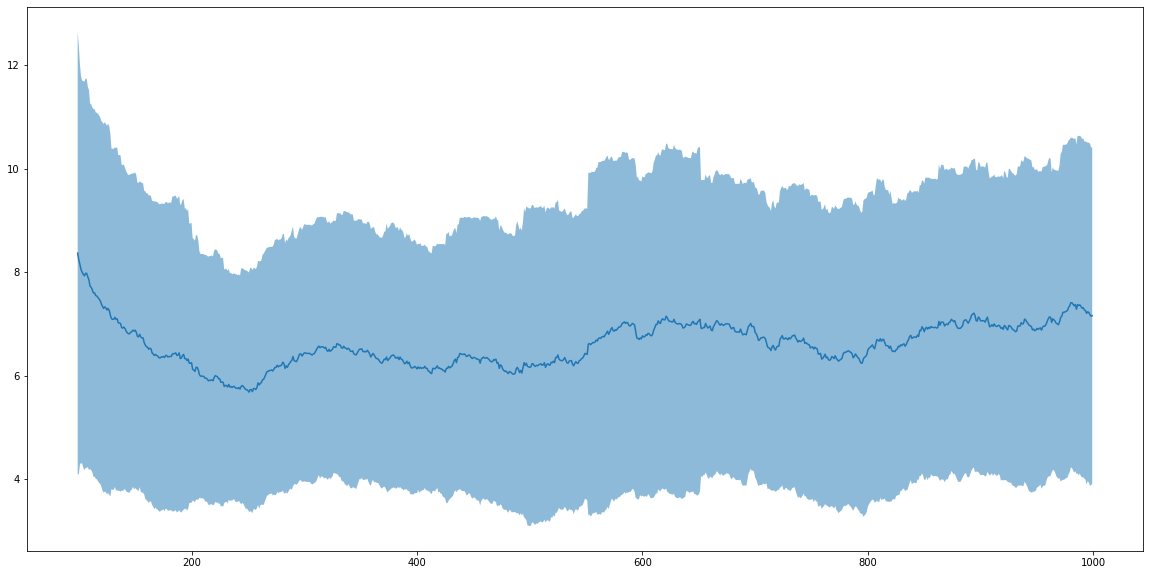

In [78]:
import pandas as pd
mean=pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').median(axis=1).rolling(100).mean()
standard_deviation=pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').median(axis=1).rolling(100).std()
plt.figure(figsize=(20,10))
plt.plot(mean)
plt.fill_between(mean.index, mean - standard_deviation, mean + standard_deviation,alpha=0.5)


# .plot(figsize=(20,10))

<AxesSubplot:xlabel='episode'>

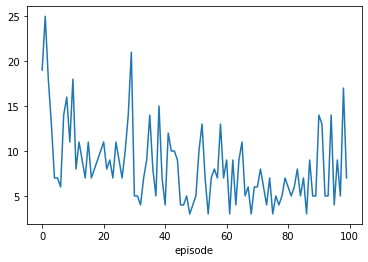

In [79]:
pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').median(axis=1).head(100
                                                                                             ).plot()

In [77]:
pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').median(axis=1)

episode
0      19.0
1      25.0
2      18.0
3      13.0
4       7.0
       ... 
995     4.5
996     4.0
997     3.0
998    11.0
999     5.5
Length: 1000, dtype: float64

In [548]:
# df2=pd.DataFrame(results).T
mean=pd.pivot_table(df2,index='episode',columns='i',values='Reward').mean(axis=1).rolling(50).mean()
standard_deviation=pd.pivot_table(df2,index='episode',columns='i',values='Reward').mean(axis=1).rolling(50).std()
plt.figure(figsize=(20,10))
plt.plot(mean)
plt.fill_between(mean.index, mean - standard_deviation, mean + standard_deviation,alpha=0.5)


# .plot(figsize=(20,10))

NameError: name 'df2' is not defined

In [1039]:
env.goal_state

[0, 0]

In [ ]:
pd.pivot_table(df2,index='episode',columns='i',values='Reward').mean(axis=1).rolling(50).std().plot(figsize=(20,10))

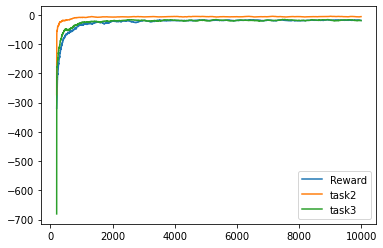

In [1295]:
import matplotlib.pyplot as plt
df.Reward.rolling(200).mean().plot()
df1.Reward.rolling(200).mean().plot(label='task2')
df2.Reward.rolling(200).mean().plot(label='task3')

plt.legend()

In [1057]:
env.current_level

3

In [1025]:
tuple(env.manager_list[env.current_level-1])

(0.0, 0.0)

<AxesSubplot:>

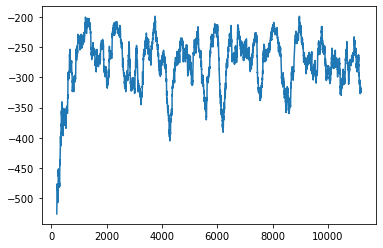

In [936]:
aaa=df.TotalNumberOFSteps.divide(df.Fastest)

In [1333]:
HQT.Q_table

{0: {(0, 0): {0: -17.280892197199954,
   1: -17.271561823811545,
   2: -17.28159414678322,
   3: -17.270567520241663,
   4: -17.27729377255779}},
 1: {(0, 0): {0: -19.772645283710116,
   1: -19.772726969003315,
   2: -19.772972409865286,
   3: -19.771993652044998,
   4: -19.77370902879129},
  (0, 1): {0: -19.742270225605374,
   1: -19.742752007445752,
   2: -19.744239471239855,
   3: -19.74306241059361,
   4: -19.742408535194716},
  (1, 0): {0: -19.77524007118979,
   1: -19.774976497165046,
   2: -19.775112468218108,
   3: -19.77425449724473,
   4: -19.774584992496713},
  (1, 1): {0: -19.759612289045865,
   1: -19.760286183662835,
   2: -19.76146701332347,
   3: -19.75937673631614,
   4: -19.76054401881633}},
 2: {(0, 0): {0: -16.825513271061723,
   1: -16.828933047503284,
   2: -16.824995020899745,
   3: -16.831823678098132,
   4: -16.835341875225758},
  (0, 1): {0: -16.94263932552593,
   1: -16.968089645702573,
   2: -16.94834345926595,
   3: -16.96868554555603,
   4: -16.95693013993

<AxesSubplot:>

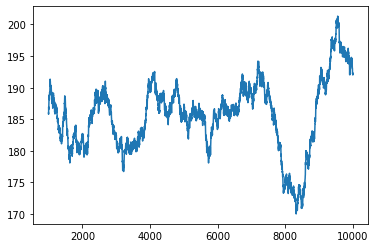

In [940]:
df.TotalNumberOFSteps.rolling(1000).mean().plot()

In [894]:
tuple(env.starting_state)tuple(env.goal_state)

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [914]:
import pprint as pprint

In [876]:
import pandas as pd

In [1314]:
pprint.pprint(HQT.Q_table)

{0: {(0, 0): {0: -19.999999955722735,
              1: -19.999999955857376,
              2: -19.99999995581861,
              3: -19.999999955681208,
              4: -19.99999995575168}},
 1: {(0, 0): {0: -1.9499999999999984,
              1: -0.9999999999999996,
              2: -0.9999999999999996,
              3: -1.9499999999999984,
              4: -1.9499999999999984},
     (0, 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
     (1, 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
     (1, 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}},
 2: {(0, 0): {0: -19.93296053681583,
              1: -19.932167712494163,
              2: -19.932664621712984,
              3: -19.93322654646499,
              4: -19.934497041362633},
     (0, 1): {0: -19.931006341844665,
              1: -19.929906464721256,
              2: -19.93054007946301,
              3: -19.931887097572222,
              4: -19.93100866310291},
     (0, 2): {0: -19.923211597558204,
              1: -19.915458074456993,
              2: -19.92275192

               1: -14.561799387734323,
               2: -14.560405144404891,
               3: -13.430599778325695,
               4: -14.569923789682544},
     (7, 15): {0: -14.681974079916227,
               1: -14.65391952184549,
               2: -14.66818632692749,
               3: -14.475350435337791,
               4: -14.658013141898712},
     (8, 0): {0: -13.018366910115287,
              1: -12.964512637623608,
              2: -10.18839022452248,
              3: -12.986537790865706,
              4: -12.998654162773384},
     (8, 1): {0: -11.885703880295141,
              1: -11.85552296653428,
              2: -7.578847532012535,
              3: -11.747246398153958,
              4: -11.70897462014223},
     (8, 2): {0: -11.641052874964714,
              1: -11.758440874681177,
              2: -4.282022386763932,
              3: -11.648184479281177,
              4: -11.777394257483081},
     (8, 3): {0: -9.83963267831493,
              1: -11.19341155836785,
        

In [878]:
pd.DataFrame.from_dict(HQT.Q_table).T


0  \
                                                   0   
0  {0: -0.6106388567189921, 1: -1.151874715244644...   
1  {0: -19.80984804046727, 1: -19.814612406840734...   
2  {0: -1.5930123246715122, 1: -2.096458028622493...   
3  {0: -0.42551569883722357, 1: -0.57867212267119...   

                                                      \
                                                   1   
0                                                NaN   
1  {0: -19.811174786866946, 1: -19.81576686173626...   
2  {0: -2.855289562156394, 1: -3.3570962506271167...   
3  {0: -0.4813474019479611, 1: -0.661640595955972...   

                                                   1  \
                                                   0   
0                                                NaN   
1  {0: -11.955371733112731, 1: -12.17580018787411...   
2  {0: -9.424050798246903, 1: -9.703683795141231,...   
3  {0: -0.1868421087172562, 1: -8.538827362344211...   

                                                      \
                                                   1   
0                                                NaN   
1  {0: -11.837691079255785, 1: -12.07177959144310...   
2  {0: -13.865303700707111, 1: -14.01736717826284...   
3  {0: -0.47732476135365587, 1: -8.30589255980965...   

                                                   0  \
                                                   2   
0                                                NaN   
1                                                NaN   
2  {0: -2.5699100133707775, 1: -3.144586009892755...   
3  {0: -0.6287339154576329, 1: -0.820953982156218...   

                                                      \
                                                   3   
0                                                NaN   
1                                                NaN   
2  {0: -1.2018383390617566, 1: -1.773832464515226...   
3  {0: -0.34704129725238875, 1: -0.81213472069015...   

                                                   1  \
                                                   2   
0                                                NaN   
1                                                NaN   
2  {0: -13.819255857157216, 1: -13.97183548994339...   
3  {0: -0.34019635288000366, 1: -9.16867827170803...   

                                                      \
                                                   3   
0                                                NaN   
1                                                NaN   
2  {0: -9.355167150233548, 1: -9.674754468267592,...   
3  {0: -0.5908389886084551, 1: -9.249910858640662...   

                                                   2  \
                                                   0   
0                                                NaN   
1                                                NaN   
2  {0: -19.188251011247456, 1: -19.21254151261569...   
3  {0: -11.255923564696337, 1: -3.822361737556142...   

                                                      ...  \
                                                   1  ...   
0                                                NaN  ...   
1                                                NaN  ...   
2  {0: -19.925289684133812, 1: -19.92758920333181...  ...   
3  {0: -11.379816526953048, 1: -4.095427212206903...  ...   

                                                   6  \
                                                   6   
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  {0: -28.24389567999682, 1: -19.7370202724043, ...   

                                                      \
                                                   7   
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  {0: -28.470469258843828, 1: -19

In [875]:
HQT.Q_table

{0: {(0, 0): {0: -0.6106388567189921,
   1: -1.151874715244644,
   2: -1.1805167170261268,
   3: -1.1330797419430196,
   4: -1.1707369951515303}},
 1: {(0, 0): {0: -19.80984804046727,
   1: -19.814612406840734,
   2: -19.814459448883156,
   3: -19.814872850987307,
   4: -19.815258020775584},
  (0, 1): {0: -19.811174786866946,
   1: -19.815766861736265,
   2: -19.815874981302926,
   3: -19.815943284978488,
   4: -19.816225716580114},
  (1, 0): {0: -11.955371733112731,
   1: -12.175800187874117,
   2: -12.163454632800065,
   3: -12.204519568769618,
   4: -12.195620303567662},
  (1, 1): {0: -11.837691079255785,
   1: -12.071779591443107,
   2: -12.068342740663272,
   3: -12.077510646152271,
   4: -12.078462115766131}},
 2: {(0, 0): {0: -1.5930123246715122,
   1: -2.096458028622493,
   2: -2.091512512261336,
   3: -2.0444083254196452,
   4: -2.1159030862153716},
  (0, 1): {0: -2.855289562156394,
   1: -3.3570962506271167,
   2: -3.3889724164949855,
   3: -3.3896319024686514,
   4: -3.37721

In [874]:
pprint(HQT.Q_table)


TypeError: 'module' object is not callable

In [839]:
env.goal_state

[6, 5]

In [840]:
env.current_state

[6, 5]

In [829]:
HQT.Q_table[current_level][tuple(current_state)][action]

0

In [815]:
max(HQT.Q_table[current_level][current_state].values())

0

In [800]:
current_state=[tuple(env.manager_list[env.current_level]) if env.current_level+1<env.layers else tuple(env.current_state)]


In [802]:
current_state[0]

(0.0, 0.0)

In [779]:
HQT.Q_table[env.current_level][tuple(env.manager_list[env.current_level])]

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

In [747]:
env.current_state

(6, 5)

In [864]:
HQT.Q_table

{0: {(0, 0): {0: 0, 1: 0, 2: 0, 3: -0.01, 4: 0}},
 1: {(0, 0): {0: -0.18627401939884114,
   1: -0.27391519057633706,
   2: -0.30714097145974845,
   3: -0.3343913166733167,
   4: -0.2782227462735092},
  (0, 1): {0: -0.21884884087268547,
   1: -0.4949278418508594,
   2: -0.4750694328979369,
   3: -0.43693196700336157,
   4: -0.41082579020515414},
  (1, 0): {0: -0.029985002499999996,
   1: -0.10595960502937014,
   2: -0.0595475811634125,
   3: -0.0395939425,
   4: -0.0592674635452},
  (1, 1): {0: -0.029985002499999996,
   1: -0.09653446364010092,
   2: -0.059176206924250005,
   3: -0.09681366187614843,
   4: -0.049666306425249995}},
 2: {(0, 0): {0: 0, 1: -0.01, 2: 0, 3: -0.01, 4: 0},
  (0, 1): {0: 0, 1: -0.01, 2: -0.0199, 3: -0.0199, 4: -0.01},
  (0, 2): {0: -0.01, 1: -0.01, 2: -0.0199, 3: -0.029701, 4: -0.01},
  (0, 3): {0: 0, 1: -0.01, 2: -0.029701, 3: 0, 4: 0},
  (1, 0): {0: -0.0498551674225125,
   1: -0.09719751571309589,
   2: -0.07837875190283228,
   3: -0.05982844565932725,
   4: 

In [756]:
HQT.Q_table[env.current_level][tuple(env.starting_managers[0])]

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

In [692]:

    
    
    
#     for na in range(env.number_actions):
#         env.Q_table[i][na]={'Qvalues':env.Maze[i][1]}